In [1]:
%%capture
# ---------------------------------------------------------------------------- #
#                        DETAILS TECHNIQUES DU NOTEBOOK                        #
# ---------------------------------------------------------------------------- #

%load_ext autoreload
%autoreload 2

import sys
import os

# Add src to path
sys.path.append(os.path.abspath(os.path.join('..', 'src', "pytorch")))

# Remove TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Description

Ce notebook a vocation a être lu après avoir lu le notebook présentant notre travail avec la bibliothèque Tensorflow. En effet, si le premier notebook suivait un tutoriel en ligne, celui-ci présente une implémentation libre du papier [Attribution Axiomatique pour les réseaux profonds](https://arxiv.org/abs/1703.01365) dans la bibliothèque **PyTorch**, qui n'est pas la bibliothèque originale de l'article.

Afin de rester cohérent avec notre premier notebook, nous avons décidé de tester la méthode d'Attribution sur le même modèle que dans le premier Notebook : **Inception**.

# Chargement du modèle

In [2]:
from Model import Model

model = Model()

Using cache found in /home/lopilo24/.cache/torch/hub/pytorch_vision_v0.10.0
/home/lopilo24/Epita/Ing3/Epita-S9-DNN/.venv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/lopilo24/Epita/Ing3/Epita-S9-DNN/.venv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


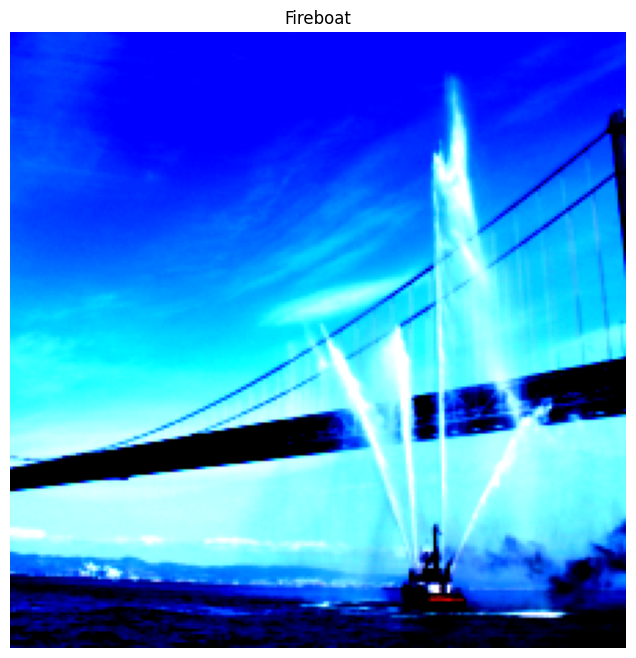

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


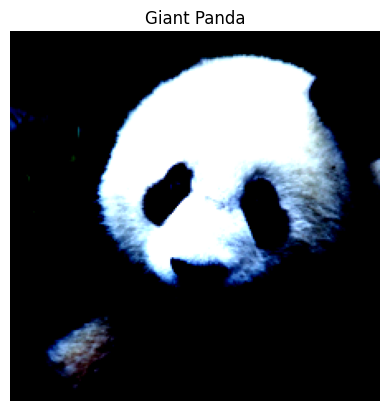

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


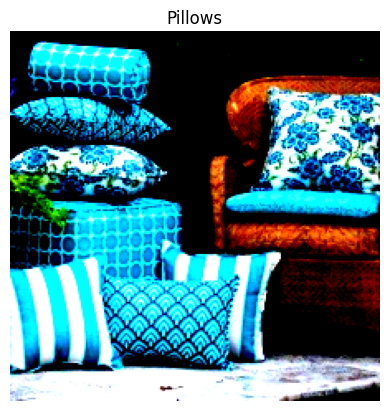

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


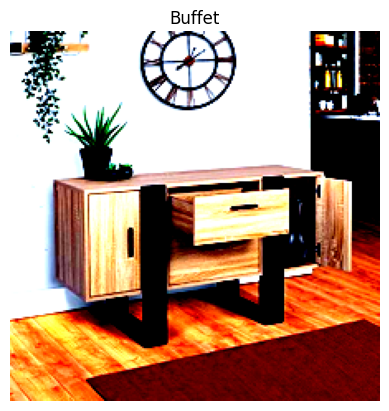

In [3]:
# ---------------------------------------------------------------------------- #
#                             CHARGEMENT DES IMAGES                            #
# ---------------------------------------------------------------------------- #

model = model.load_images({
    'Fireboat': 'http://storage.googleapis.com/download.tensorflow.org/example_images/San_Francisco_fireboat_showing_off.jpg',
    'Giant Panda': 'http://storage.googleapis.com/download.tensorflow.org/example_images/Giant_Panda_2.jpeg',
    'Pillows': 'https://www.lecloudore87.fr/bckgd_img/9b4f9edf7f9ef8007419a0a534bce772.jpg',
    'Buffet': 'https://m.media-amazon.com/images/I/51hDVOFQycL._AC_.jpg',
}, display=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


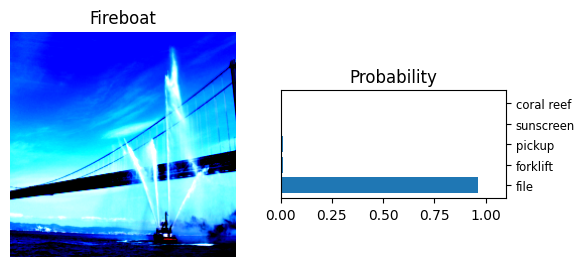

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


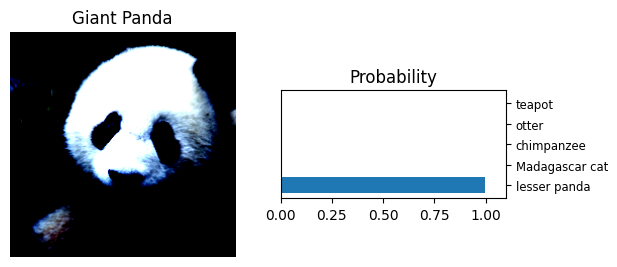

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


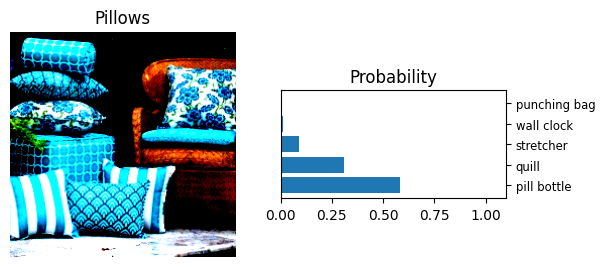

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


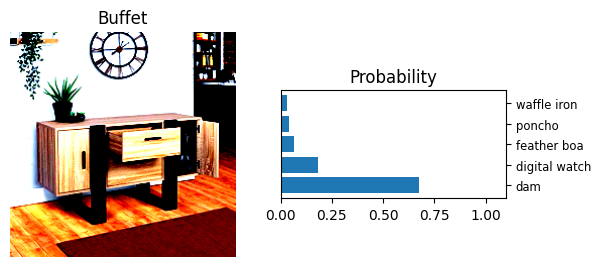

In [4]:
model.predict(display=True)

In [5]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'googlenet', pretrained=True)
model.eval()

# Download an example image from the pytorch website
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
print("Top 5 categories:")
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

Using cache found in /home/lopilo24/.cache/torch/hub/pytorch_vision_v0.10.0


tensor([ 3.6248e-02, -2.2878e-01, -3.2281e-01,  5.7066e-02,  1.1319e-01,
        -2.8171e-01,  6.1703e-01,  6.1631e-02,  9.4573e-01, -1.4970e+00,
        -5.5051e-01, -3.4169e-02, -1.2637e+00, -3.1371e-02,  5.3473e-01,
         1.8768e-01,  4.9397e-01, -2.8189e-01, -2.7135e-01, -2.6063e-01,
        -3.3340e-01, -7.6280e-02,  6.7012e-02, -5.6959e-01, -5.3144e-01,
        -4.9614e-02,  7.2037e-01,  1.1622e+00,  5.1483e-01,  1.3022e+00,
         6.9019e-01,  5.5664e-01,  1.3297e-01, -7.1064e-01, -5.0417e-01,
        -2.4477e-01, -5.9953e-01,  1.9402e-01, -3.2121e-01,  6.1765e-01,
         2.9755e-01, -2.4240e-01,  1.8622e-01, -4.5801e-01,  1.5274e-01,
        -6.8355e-01,  9.9119e-01,  6.1598e-01, -1.2938e+00, -4.6673e-01,
        -7.0885e-02, -2.9635e-04,  3.7332e-01,  1.8041e-01,  8.5810e-01,
         1.0059e+00, -3.0312e-01,  2.0277e-02,  7.7753e-02,  8.1285e-01,
         7.7642e-01, -7.0515e-01, -2.2631e-01, -2.5764e-01,  1.5600e-01,
        -4.5729e-01,  7.8165e-01,  1.4327e-01,  1.0